In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from .txt format (assuming it's tab-separated or comma-separated)
file_path = '../data/MachineLearningRating_v3.txt'

df = pd.read_csv(file_path, sep='|')



C:\Users\Akram 1\AppData\Local\Temp\ipykernel_10432\2392206408.py:10: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='|')


In [2]:
# 1. Data Summarization:
## Descriptive Statistics
print("Descriptive Statistics:")
numerical_columns = ['TotalPremium', 'TotalClaims']
print(df[numerical_columns].describe())

# Variability (Standard deviation) for numerical features
print("\nVariability (Standard Deviation):")
print(df[numerical_columns].std())


Descriptive Statistics:
       TotalPremium   TotalClaims
count  1.000098e+06  1.000098e+06
mean   6.190550e+01  6.486119e+01
std    2.302845e+02  2.384075e+03
min   -7.825768e+02 -1.200241e+04
25%    0.000000e+00  0.000000e+00
50%    2.178333e+00  0.000000e+00
75%    2.192982e+01  0.000000e+00
max    6.528260e+04  3.930921e+05

Variability (Standard Deviation):
TotalPremium     230.284513
TotalClaims     2384.074695
dtype: float64


In [14]:
# Importing required libraries
import pandas as pd
import numpy as np

# Load the data from .txt format (assuming it's tab-separated or comma-separated)
file_path = '../data/MachineLearningRating_v3.txt'

# Load the data
df = pd.read_csv(file_path, sep='|')

# Inspect the first few rows of 'TransactionMonth' and 'VehicleIntroDate' to understand their format
print("TransactionMonth sample:\n", df['TransactionMonth'].head())
print("VehicleIntroDate sample:\n", df['VehicleIntroDate'].head())

# Attempt to convert date columns to appropriate formats
# Adjust format based on the actual format of your data
try:
    df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], format='%Y-%m', errors='coerce')
except Exception as e:
    print(f"Error converting 'TransactionMonth': {e}")

try:
    df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'], errors='coerce')
except Exception as e:
    print(f"Error converting 'VehicleIntroDate': {e}")

# Descriptive Statistics: Calculating Variability for numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
descriptive_stats = df[numeric_cols].describe()

# Variability metrics
variability = df[numeric_cols].agg(['std', 'var', lambda x: x.max() - x.min()])

# Rename the last row to 'range'
variability.index = ['std', 'var', 'range']

print("Descriptive Statistics:\n", descriptive_stats)
print("\nVariability (Standard Deviation, Variance, Range):\n", variability)

# Check data structure: dtypes of each column
dtypes_info = df.dtypes

print("\nData Structure (Dtypes):\n", dtypes_info)

# Check if categorical columns are properly formatted
categorical_cols = df.select_dtypes(include=['object']).columns

print("\nCategorical Columns:\n", categorical_cols)

# Convert specific columns to categorical dtype
categorical_cols_to_convert = [
    'Citizenship', 'LegalType', 'Title', 'Language',
    'Bank', 'AccountType', 'MaritalStatus', 'Gender',
    'Country', 'Province', 'MainCrestaZone',
    'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType',
    'bodytype', 'CoverCategory', 'CoverType', 'CoverGroup',
    'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType'
]

# Ensure that the columns exist before converting
for col in categorical_cols_to_convert:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Confirm dtype after conversion
print("\nUpdated Data Structure (Dtypes after conversion):\n", df.dtypes)


C:\Users\Akram 1\AppData\Local\Temp\ipykernel_10432\1398786473.py:9: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='|')


TransactionMonth sample:
 0    2015-03-01 00:00:00
1    2015-05-01 00:00:00
2    2015-07-01 00:00:00
3    2015-05-01 00:00:00
4    2015-07-01 00:00:00
Name: TransactionMonth, dtype: object
VehicleIntroDate sample:
 0    6/2002
1    6/2002
2    6/2002
3    6/2002
4    6/2002
Name: VehicleIntroDate, dtype: object


C:\Users\Akram 1\AppData\Local\Temp\ipykernel_10432\1398786473.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'], errors='coerce')


Descriptive Statistics:
        UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000

In [15]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing Values Summary:\n", missing_values)

Missing Values Summary:
 TransactionMonth           1000098
Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64


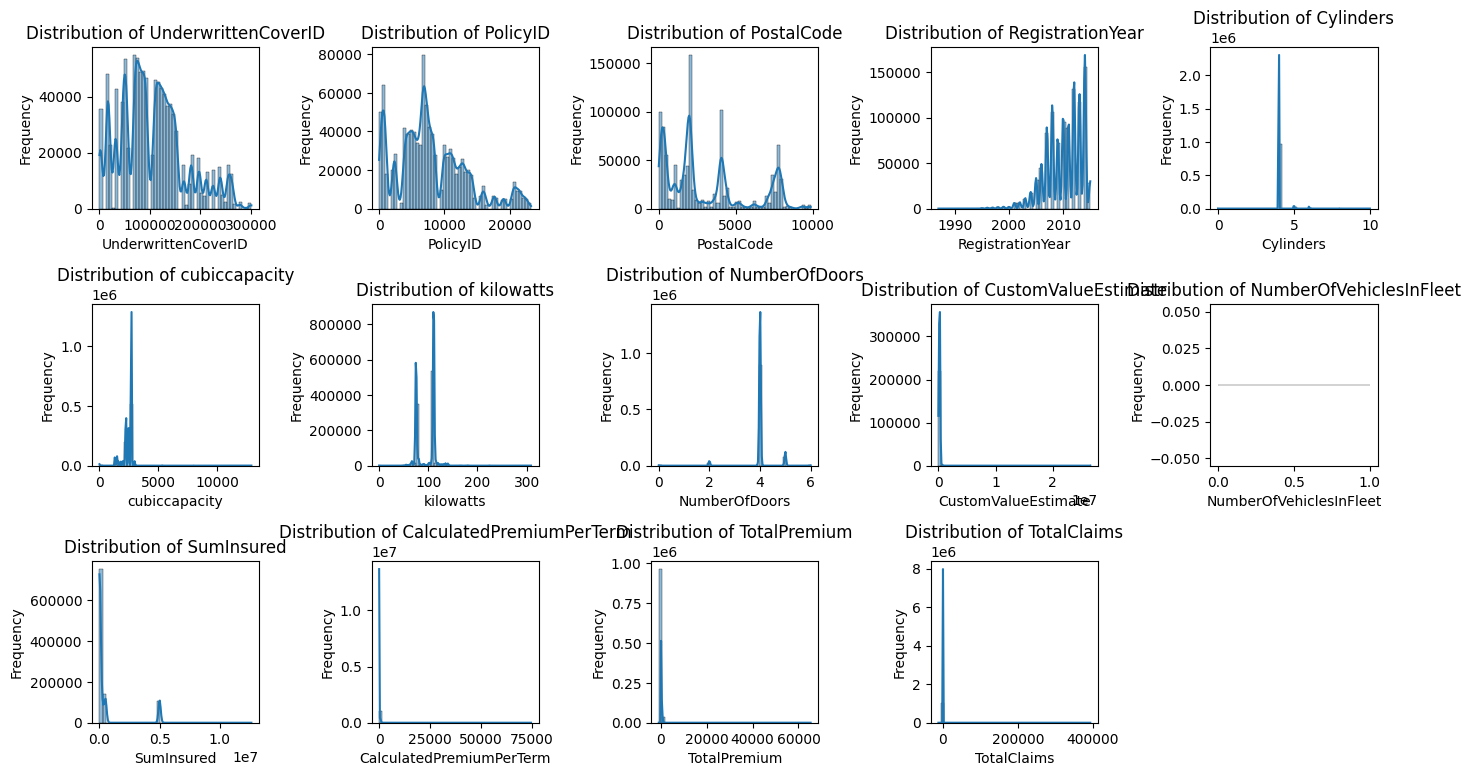

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 5, i)  # Adjust the number of rows and columns according to your data
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\Akram 1\AppData\Local\Temp\ipykernel_10432\2512164077.py:23: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


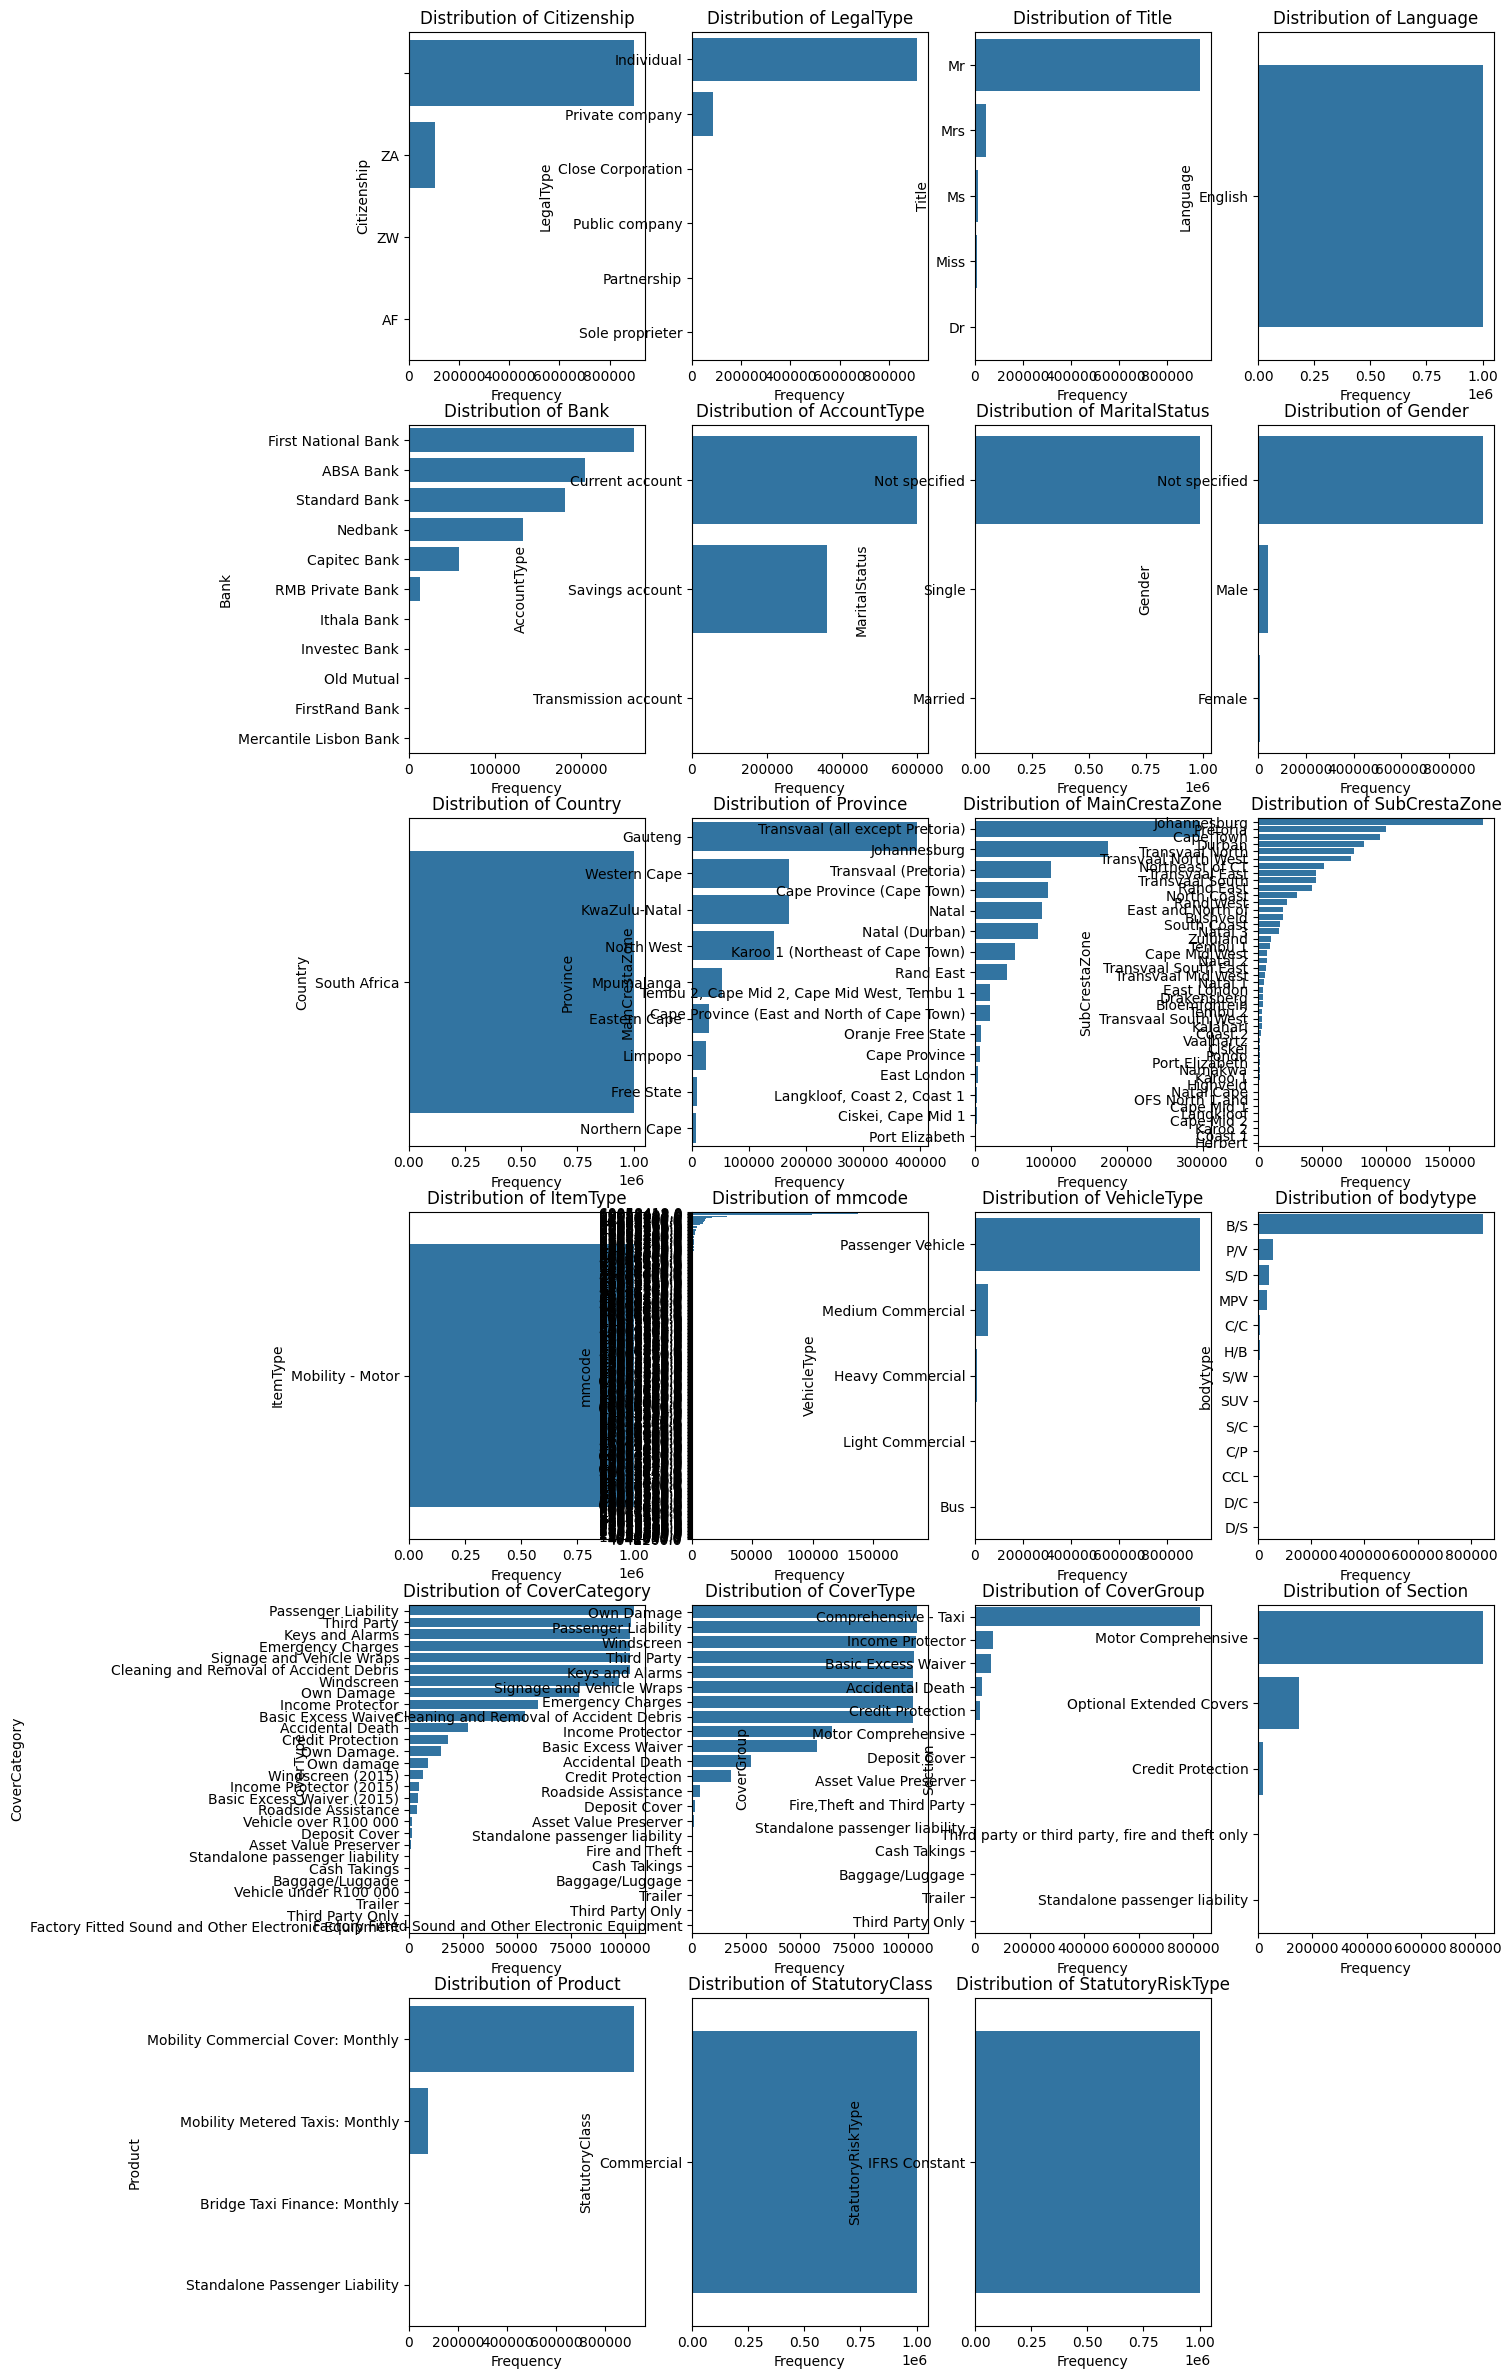

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the categorical columns
categorical_cols = df.select_dtypes(include=['category']).columns

# Determine the number of rows and columns needed
num_cols = len(categorical_cols)
num_rows = (num_cols + 2) // 3  # Adds enough rows to fit all columns

# Create a figure with the appropriate size
plt.figure(figsize=(14, num_rows * 5))  # Adjust height as needed

# Plot each categorical column
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(num_rows, 4, i)  # Adjust rows and columns based on the number of categorical columns
    sns.countplot(y=df[col].dropna(), order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Frequency')
    plt.ylabel(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


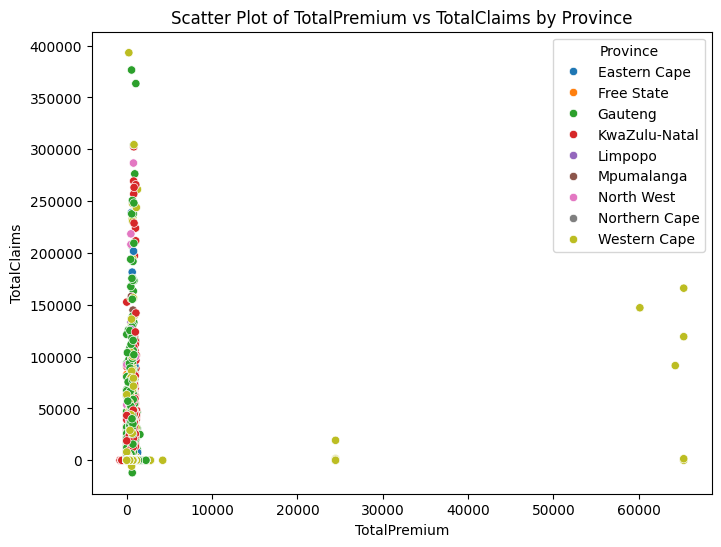

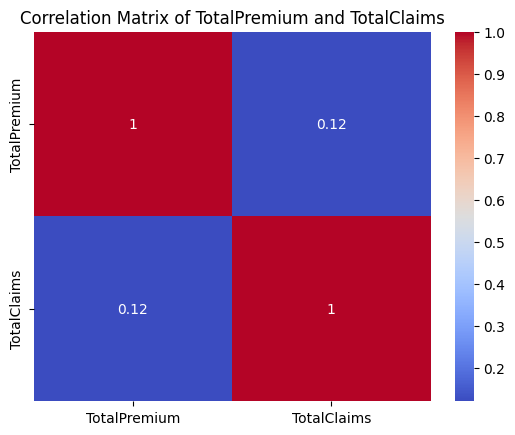


Correlation Matrix:
               TotalPremium  TotalClaims
TotalPremium      1.000000     0.121588
TotalClaims       0.121588     1.000000


In [25]:

# Scatter plot for TotalPremium vs TotalClaims using Province as the hue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='Province', data=df)
plt.title('Scatter Plot of TotalPremium vs TotalClaims by Province')
plt.show()

# Correlation matrix for numerical variables (TotalPremium and TotalClaims)
correlation_matrix = df[['TotalPremium', 'TotalClaims']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of TotalPremium and TotalClaims')
plt.show()

# Correlation matrix for TotalPremium and TotalClaims
correlation_matrix = df[['TotalPremium', 'TotalClaims']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)



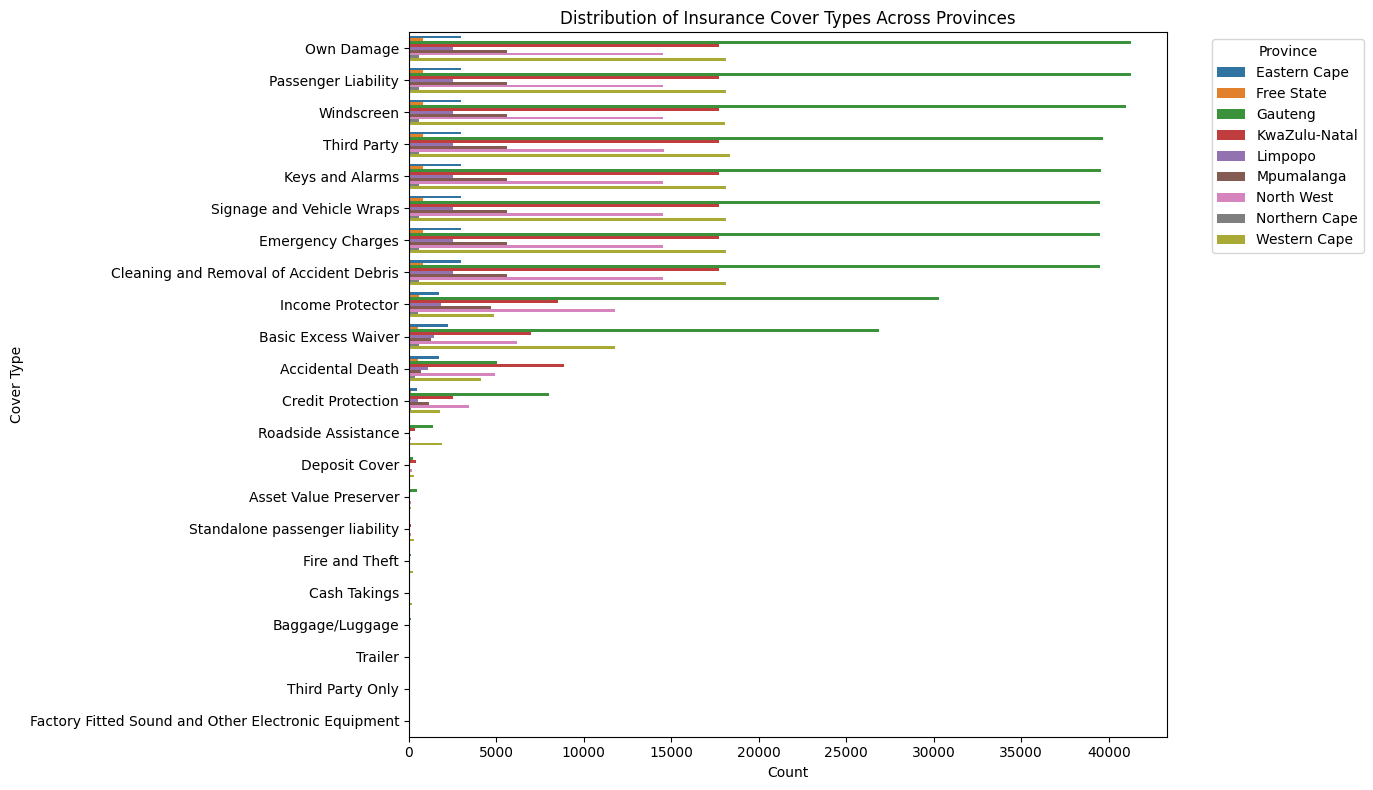

C:\Users\Akram 1\AppData\Local\Temp\ipykernel_10432\3829162133.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='make', y='CalculatedPremiumPerTerm', data=df, palette='Set2')


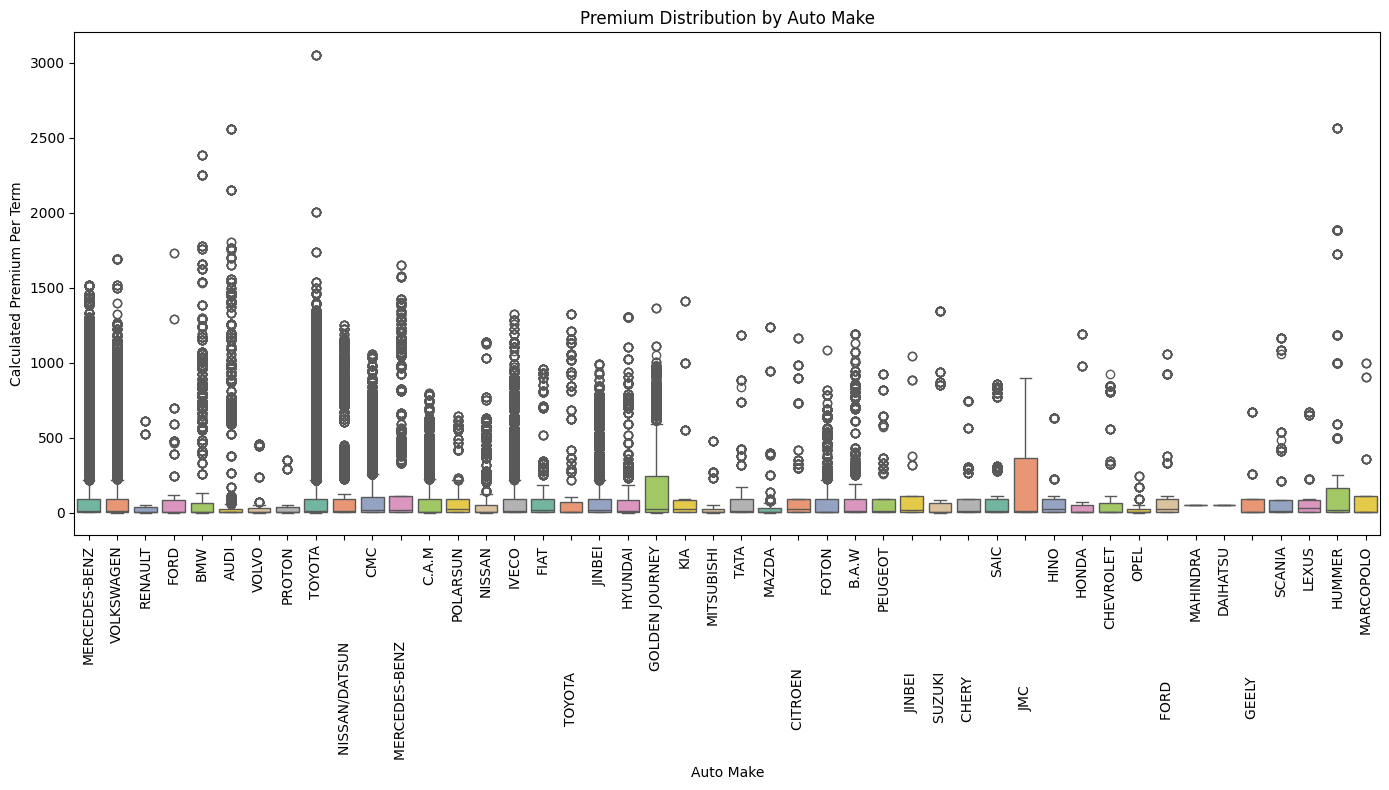

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of insurance cover type by province
plt.figure(figsize=(14, 8))
sns.countplot(data=df, y='CoverType', hue='Province', order=df['CoverType'].value_counts().index)
plt.title('Distribution of Insurance Cover Types Across Provinces')
plt.xlabel('Count')
plt.ylabel('Cover Type')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()





plt.figure(figsize=(14, 8))
sns.boxplot(x='make', y='CalculatedPremiumPerTerm', data=df, palette='Set2')
plt.xticks(rotation=90)
plt.title('Premium Distribution by Auto Make')
plt.xlabel('Auto Make')
plt.ylabel('Calculated Premium Per Term')
plt.tight_layout()
plt.show()

C:\Users\Akram 1\AppData\Local\Temp\ipykernel_10432\2425049978.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Province', y='TotalPremium', data=df, estimator='mean', palette='viridis')


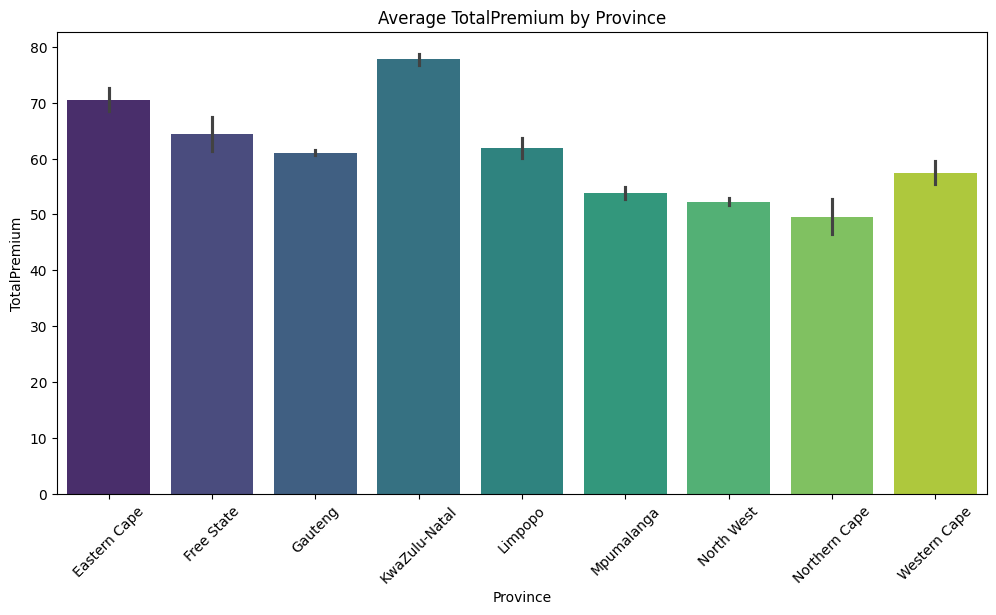

C:\Users\Akram 1\AppData\Local\Temp\ipykernel_10432\2425049978.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  auto_make_count = df.groupby(['Province', 'make']).size().reset_index(name='Count')


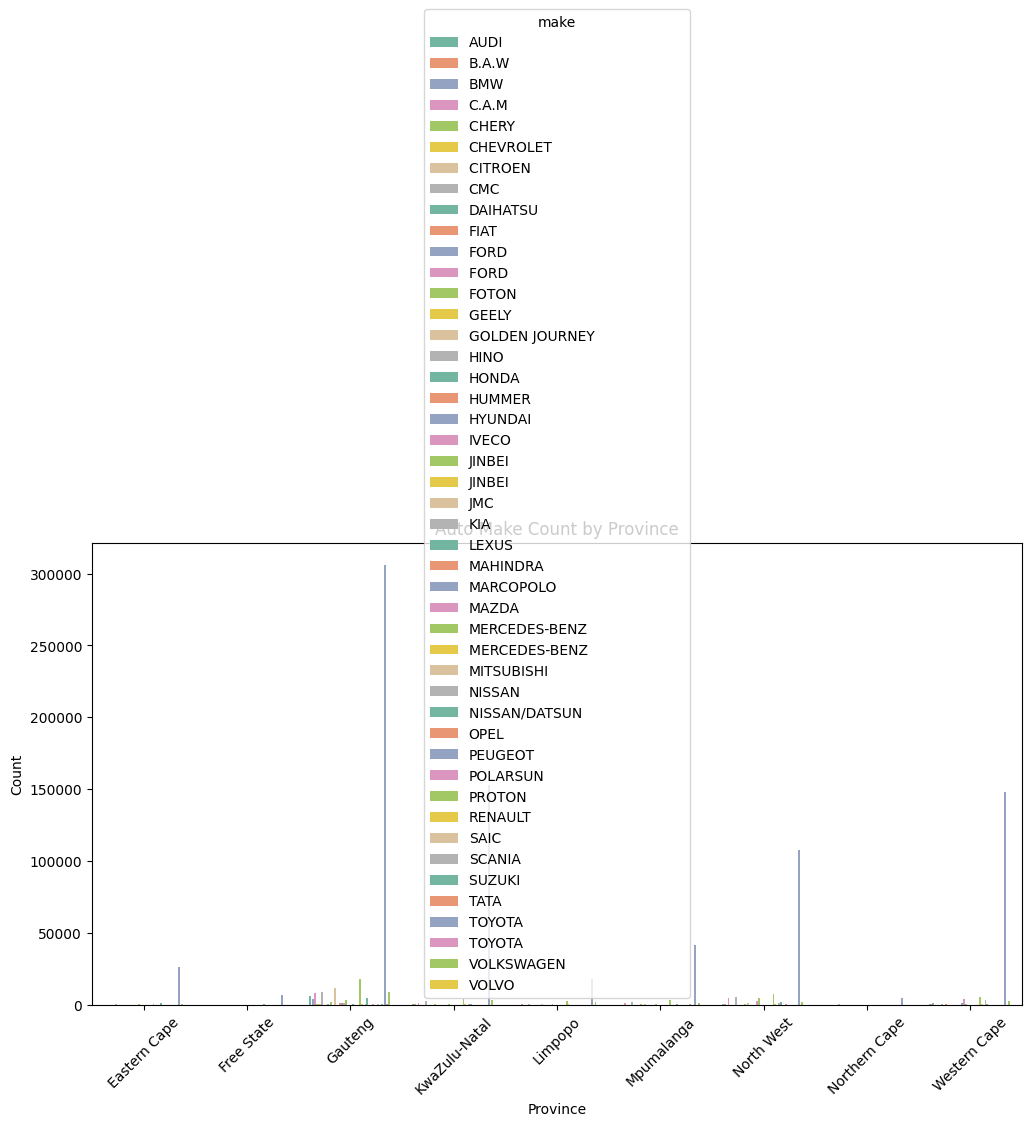

In [29]:
# 1. Data Comparison: Trends Over Geography

# Compare average TotalPremium by Province
plt.figure(figsize=(12, 6))
sns.barplot(x='Province', y='TotalPremium', data=df, estimator='mean', palette='viridis')
plt.title('Average TotalPremium by Province')
plt.xticks(rotation=45)
plt.show()

# Compare average Count of Auto Makes by Province
auto_make_count = df.groupby(['Province', 'make']).size().reset_index(name='Count')
plt.figure(figsize=(12, 6))
sns.barplot(x='Province', y='Count', hue='make', data=auto_make_count, palette='Set2')
plt.title('Auto Make Count by Province')
plt.xticks(rotation=45)
plt.show()

<Figure size 1400x800 with 0 Axes>

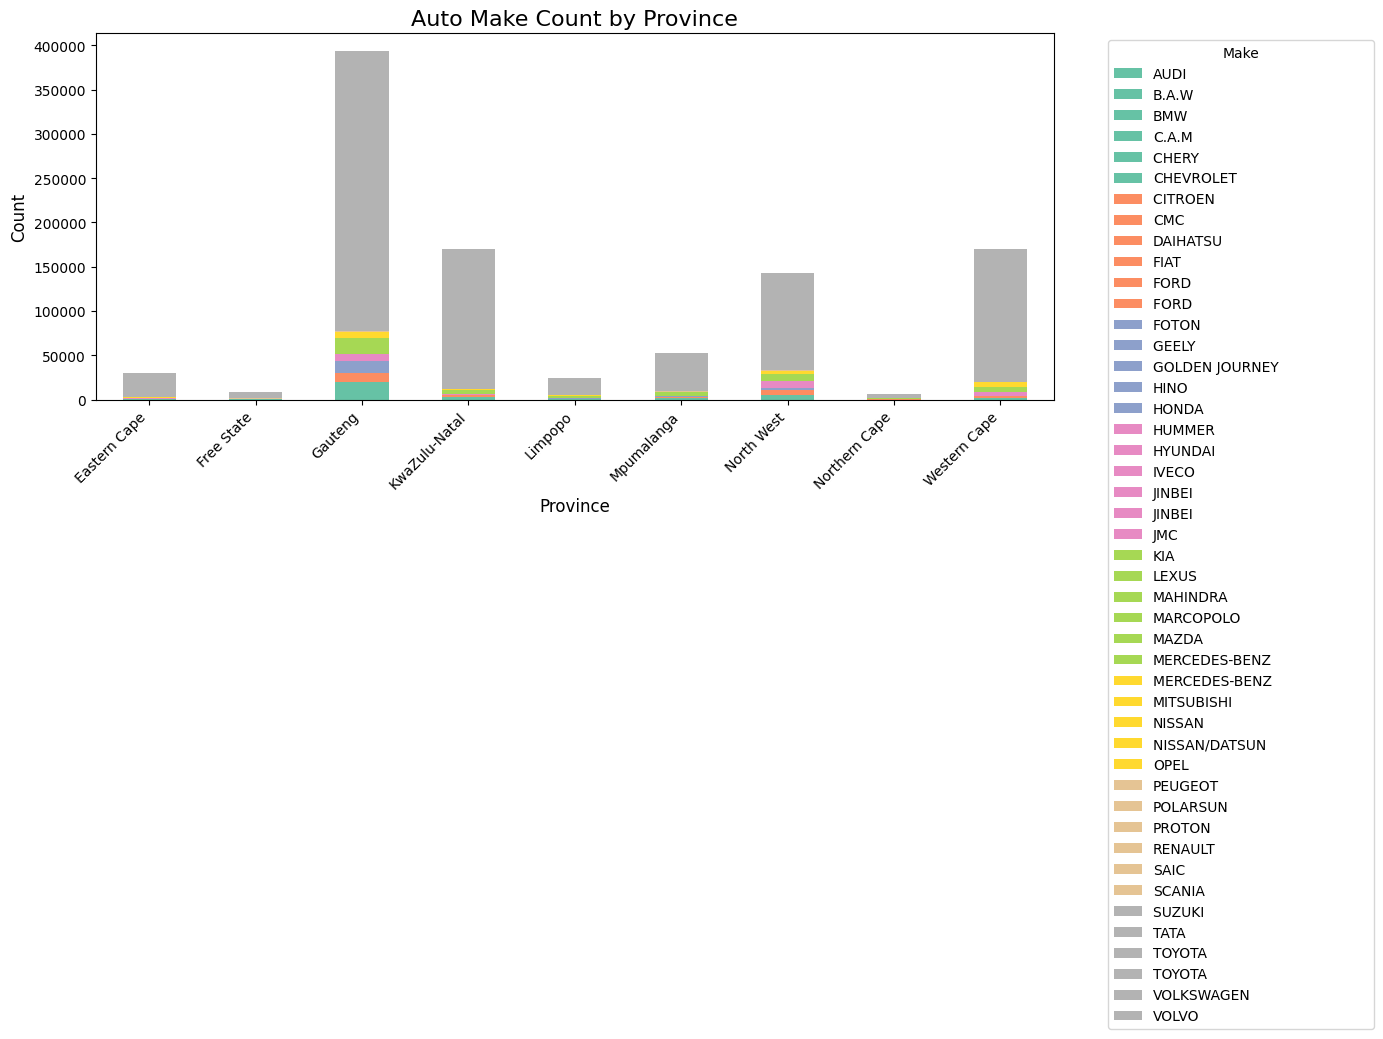

In [8]:
# Grouping by Province and summing the counts of each make
auto_make_count = df.groupby(['Province', 'make']).size().reset_index(name='Count')

# Pivot the table to get data in a more suitable format for a stacked bar chart
auto_make_pivot = auto_make_count.pivot(index='Province', columns='make', values='Count').fillna(0)

# Plotting the stacked bar chart
plt.figure(figsize=(14, 8))
auto_make_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), cmap='Set2')

# Customizing the plot
plt.title('Auto Make Count by Province', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Province', fontsize=12)

# Adding legend and labels
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


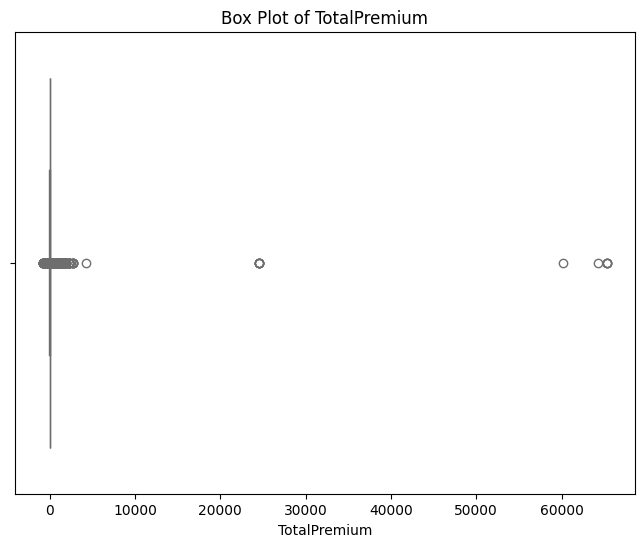

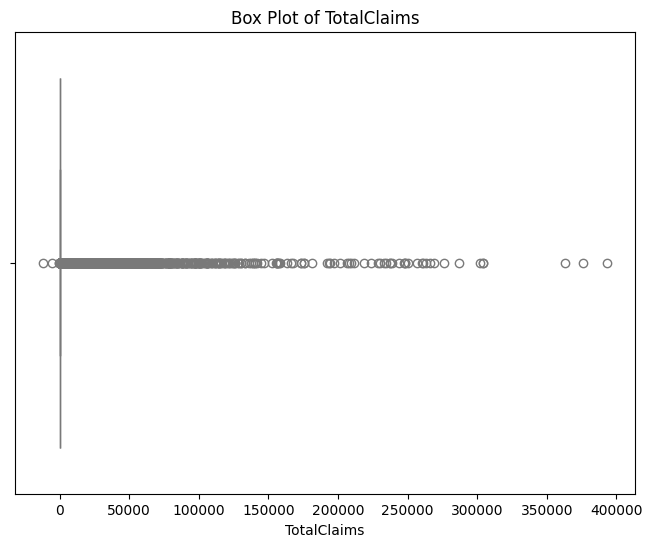

In [30]:
# 2. Outlier Detection: Box Plots

# Box plot for TotalPremium
plt.figure(figsize=(8, 6))
sns.boxplot(x='TotalPremium', data=df, color='lightcoral')
plt.title('Box Plot of TotalPremium')
plt.show()

# Box plot for TotalClaims
plt.figure(figsize=(8, 6))
sns.boxplot(x='TotalClaims', data=df, color='lightblue')
plt.title('Box Plot of TotalClaims')
plt.show()

C:\Users\Akram 1\AppData\Local\Temp\ipykernel_10432\107624376.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='CalculatedPremiumPerTerm', index='make', columns='Province', aggfunc='mean')


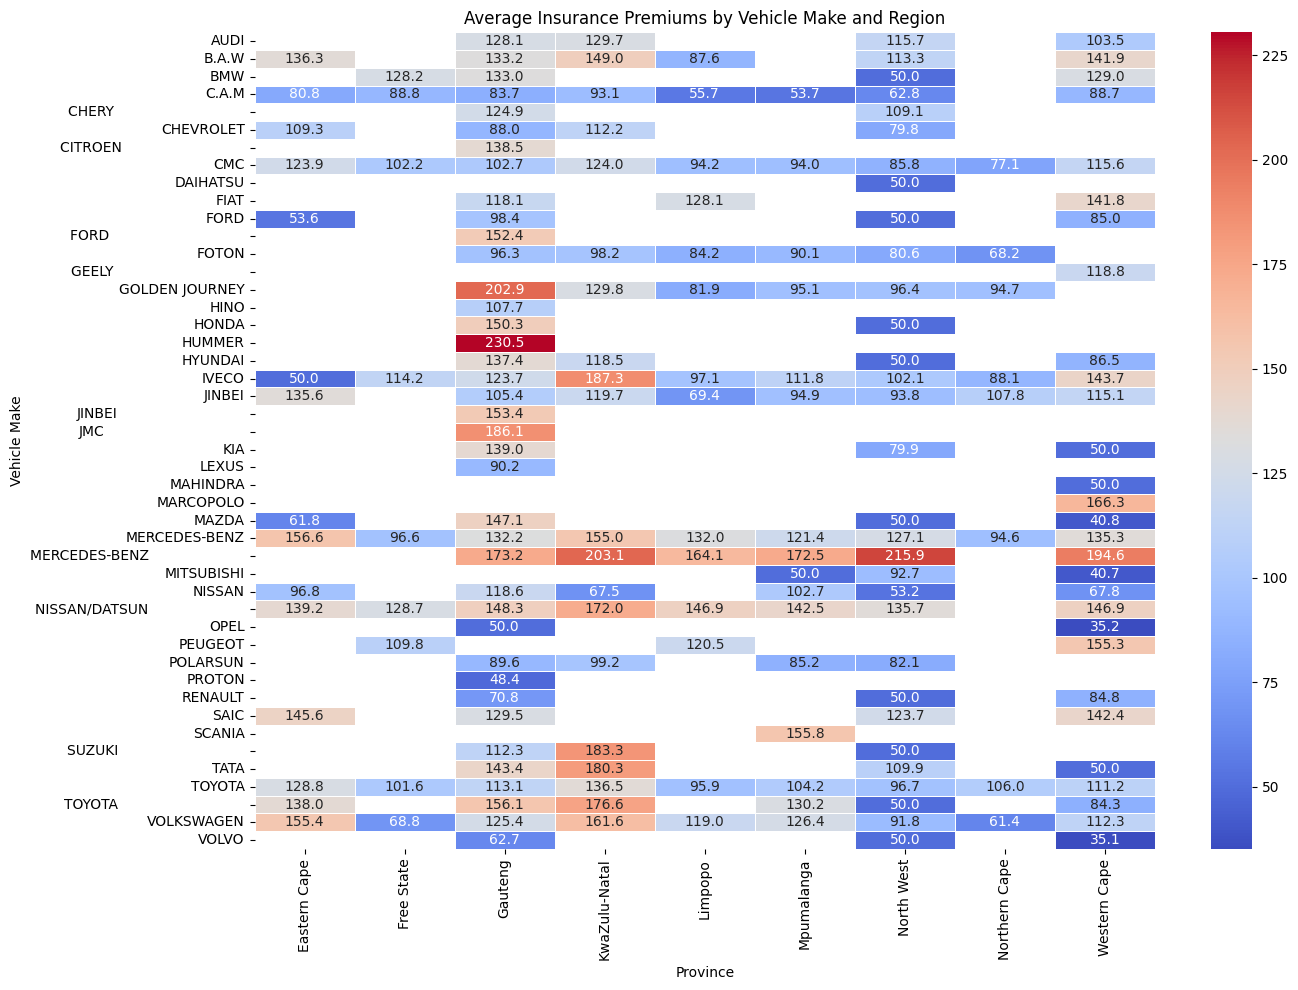

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table for the heatmap
pivot_table = df.pivot_table(values='CalculatedPremiumPerTerm', index='make', columns='Province', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
plt.title('Average Insurance Premiums by Vehicle Make and Region')
plt.xlabel('Province')
plt.ylabel('Vehicle Make')
plt.tight_layout()
plt.show()


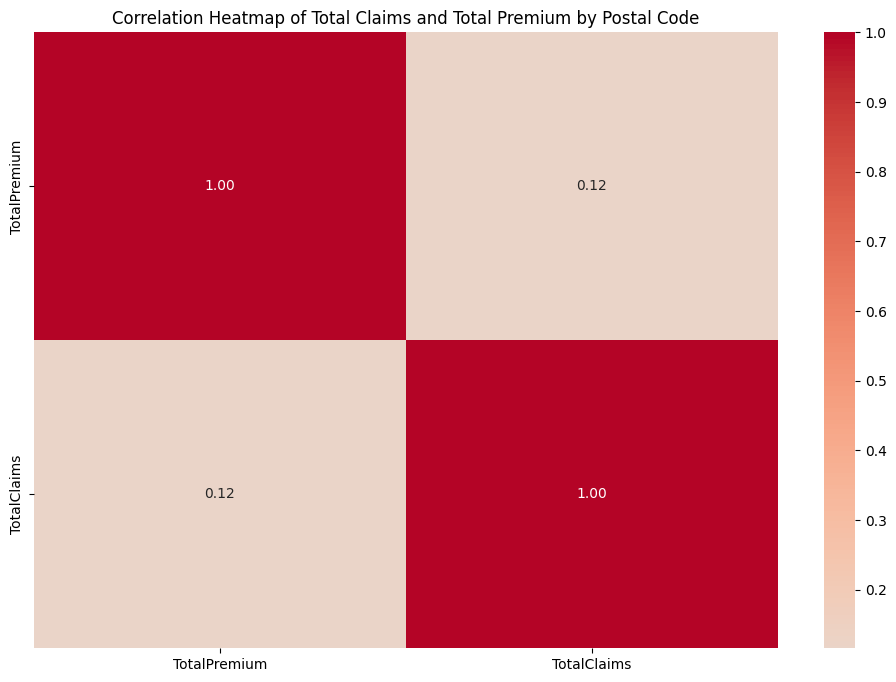

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the FacetGrid
g = sns.FacetGrid(df, col="VehicleType", col_wrap=4, height=4, sharex=False, sharey=True)
g.map(sns.histplot, "CalculatedPremiumPerTerm", bins=30, kde=True, color="blue")
g.set_axis_labels('Premium', 'Frequency')
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.suptitle('Distribution of Insurance Premiums by Vehicle Type', y=1.02)
plt.tight_layout()
plt.show()


C:\Users\Akram 1\AppData\Local\Temp\ipykernel_10432\437441227.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CoverType', y='TotalClaims', data=df, palette='Set2')


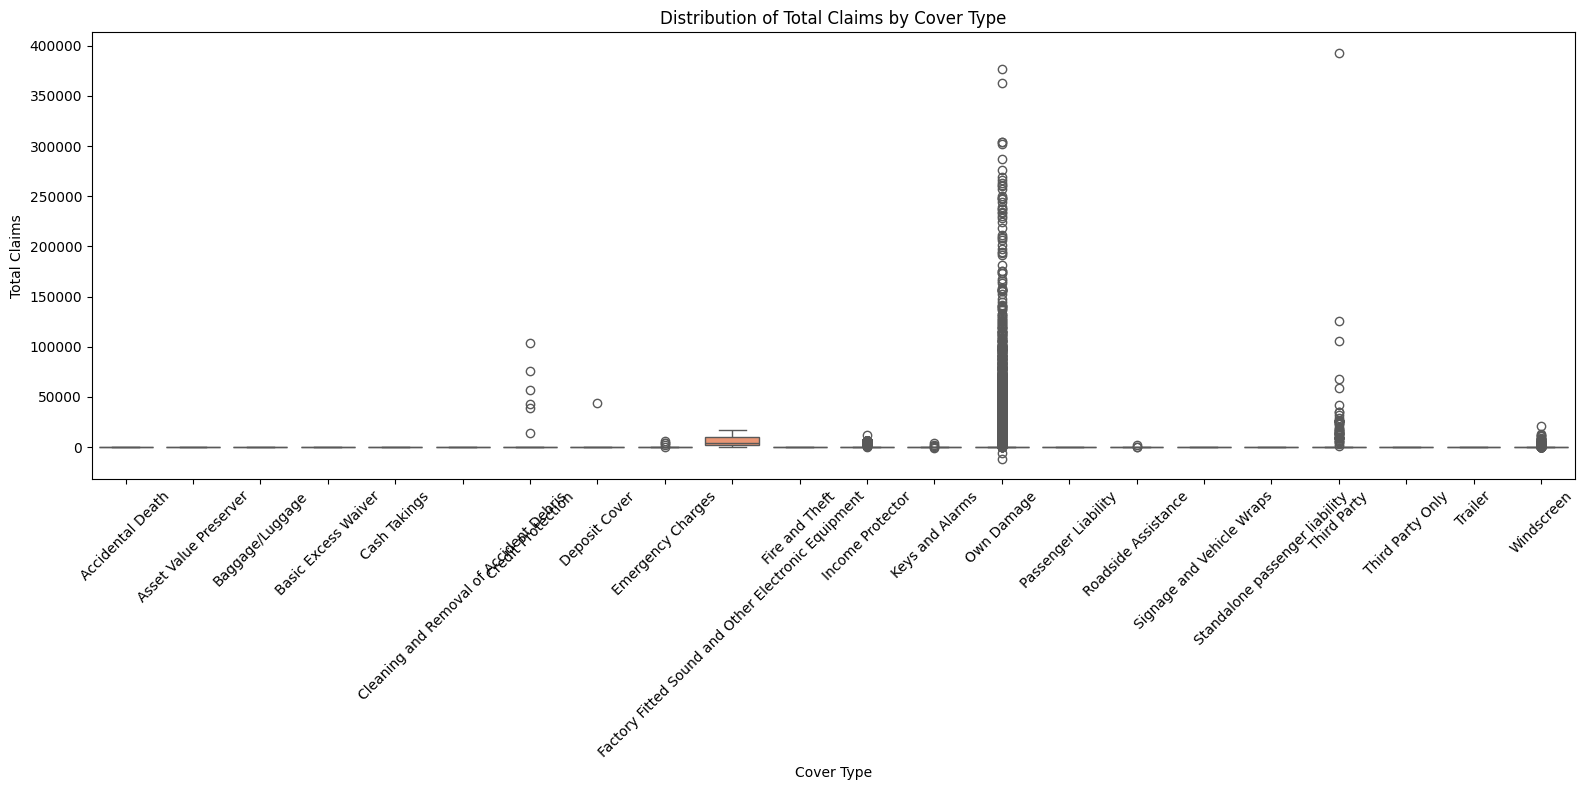

In [34]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='CoverType', y='TotalClaims', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.title('Distribution of Total Claims by Cover Type')
plt.xlabel('Cover Type')
plt.ylabel('Total Claims')
plt.tight_layout()
plt.show()